<a href="https://colab.research.google.com/github/DrVenkataRajeshKumar/CondyleClassification/blob/main/ShortStudyCondClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
!rm -rf short.study
!wget -q https://github.com/DrVenkataRajeshKumar/CondyleClassification/releases/download/condyles/short.study.zip
!unzip -q short.study

In [7]:
!pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [14]:
import torch
import torch.nn as nn
from torchvision import models

# Define the same model architecture (ResNet18)
model = models.resnet18(weights=None)  # Use weights=None since 'pretrained' is deprecated
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # Adjusting to 4 output classes

# Load the saved weights, and map them to the CPU (or current device if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth', map_location=device))

# Set the model to evaluation mode
model.eval()

# Now you can use the model for inference or further training


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
# Define transformations
preprocess = transforms.Compose([
    #transforms.Resize((128, 128)),  # Resize image to 224x224 or the size your model expects
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [16]:
def classify_image(image_path, model, preprocess):
    image = Image.open(image_path).convert("RGB")
    image = preprocess(image)
    image = image.unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    return predicted.item()


In [21]:
from collections import defaultdict

# Path to the dataset folders
base_folder = '/content/short_study/class_1'

# Dictionary to hold counts
class_counts = defaultdict(int)
total_images = 0

# Iterate through the folders
for folder_name in os.listdir(base_folder):
    folder_path = os.path.join(base_folder, folder_name)
    if os.path.isdir(folder_path):
        for class_folder in os.listdir(folder_path):
            class_folder_path = os.path.join(folder_path, class_folder)
            if os.path.isdir(class_folder_path):
                for image_name in os.listdir(class_folder_path):
                    image_path = os.path.join(class_folder_path, image_name)
                    predicted_class = classify_image(image_path, model, preprocess)
                    class_counts[predicted_class] += 1
                    total_images += 1

# Calculate percentages
class_percentages = {cls: (count / total_images) * 100 for cls, count in class_counts.items()}

# Print results
print("Class counts:", class_counts)
print("Class percentages:", class_percentages)


Class counts: defaultdict(<class 'int'>, {})
Class percentages: {}


In [22]:
import torch
from torchvision import transforms
from PIL import Image
import os

# Load the trained model
model = models.resnet18(weights=None)  # Use weights=None since 'pretrained' is deprecated
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # Adjust to your number of classes (4)

# Load the saved weights onto the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth', map_location=device))
model = model.to(device)
model.eval()

# Define the data transforms (same as used during training)
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Path to the folder containing images from all classes
image_folder = '/content/short_study/class_1'

# Dictionary to store class-wise counts
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Load and predict on each image in the folder
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    try:
        # Open the image file
        image = Image.open(image_path)

        # Apply transformations
        image = data_transforms(image).unsqueeze(0)  # Add batch dimension

        # Move image to the appropriate device
        image = image.to(device)

        # Make prediction
        with torch.no_grad():
            outputs = model(image)
            _, predicted_class = torch.max(outputs, 1)
            class_counts[predicted_class.item()] += 1

    except Exception as e:
        print(f"Error loading or processing image {image_name}: {e}")

# Calculate the total number of images
total_images = sum(class_counts.values())

# Calculate percentage for each class
class_percentages = {class_idx: (count / total_images) * 100 for class_idx, count in class_counts.items()}

# Print the results
for class_idx, count in class_counts.items():
    print(f"Class {class_idx + 1}: {count} images ({class_percentages[class_idx]:.2f}%)")

# Overall results
print(f"Total images processed: {total_images}")


Class 1: 181 images (98.37%)
Class 2: 1 images (0.54%)
Class 3: 1 images (0.54%)
Class 4: 1 images (0.54%)
Total images processed: 184


In [23]:
import torch
from torchvision import transforms
from PIL import Image
import os

# Load the trained model
model = models.resnet18(weights=None)  # Use weights=None since 'pretrained' is deprecated
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # Adjust to your number of classes (4)

# Load the saved weights onto the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth', map_location=device))
model = model.to(device)
model.eval()

# Define the data transforms (same as used during training)
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Path to the folder containing images from all classes
image_folder = '/content/short_study/class_2'

# Dictionary to store class-wise counts
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Load and predict on each image in the folder
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    try:
        # Open the image file
        image = Image.open(image_path)

        # Apply transformations
        image = data_transforms(image).unsqueeze(0)  # Add batch dimension

        # Move image to the appropriate device
        image = image.to(device)

        # Make prediction
        with torch.no_grad():
            outputs = model(image)
            _, predicted_class = torch.max(outputs, 1)
            class_counts[predicted_class.item()] += 1

    except Exception as e:
        print(f"Error loading or processing image {image_name}: {e}")

# Calculate the total number of images
total_images = sum(class_counts.values())

# Calculate percentage for each class
class_percentages = {class_idx: (count / total_images) * 100 for class_idx, count in class_counts.items()}

# Print the results
for class_idx, count in class_counts.items():
    print(f"Class {class_idx + 1}: {count} images ({class_percentages[class_idx]:.2f}%)")

# Overall results
print(f"Total images processed: {total_images}")


Class 1: 170 images (98.27%)
Class 2: 1 images (0.58%)
Class 3: 2 images (1.16%)
Class 4: 0 images (0.00%)
Total images processed: 173


In [24]:
import torch
from torchvision import transforms
from PIL import Image
import os

# Load the trained model
model = models.resnet18(weights=None)  # Use weights=None since 'pretrained' is deprecated
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # Adjust to your number of classes (4)

# Load the saved weights onto the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(torch.load('/content/drive/MyDrive/best_model.pth', map_location=device))
model = model.to(device)
model.eval()

# Define the data transforms (same as used during training)
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Path to the folder containing images from all classes
image_folder = '/content/short_study/class_3'

# Dictionary to store class-wise counts
class_counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Load and predict on each image in the folder
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    try:
        # Open the image file
        image = Image.open(image_path)

        # Apply transformations
        image = data_transforms(image).unsqueeze(0)  # Add batch dimension

        # Move image to the appropriate device
        image = image.to(device)

        # Make prediction
        with torch.no_grad():
            outputs = model(image)
            _, predicted_class = torch.max(outputs, 1)
            class_counts[predicted_class.item()] += 1

    except Exception as e:
        print(f"Error loading or processing image {image_name}: {e}")

# Calculate the total number of images
total_images = sum(class_counts.values())

# Calculate percentage for each class
class_percentages = {class_idx: (count / total_images) * 100 for class_idx, count in class_counts.items()}

# Print the results
for class_idx, count in class_counts.items():
    print(f"Class {class_idx + 1}: {count} images ({class_percentages[class_idx]:.2f}%)")

# Overall results
print(f"Total images processed: {total_images}")


Error loading or processing image Copy of 63.png: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0
Class 1: 109 images (97.32%)
Class 2: 0 images (0.00%)
Class 3: 3 images (2.68%)
Class 4: 0 images (0.00%)
Total images processed: 112


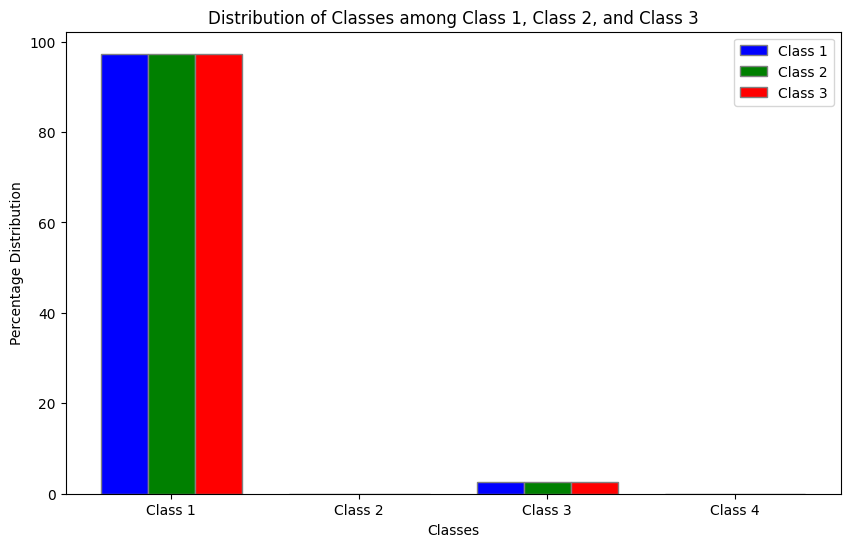

In [25]:
# prompt: generate a graph or table for distribution of calsses among class_1, class_2 and class_3

import matplotlib.pyplot as plt
import numpy as np

# Data from previous calculations (replace with your actual data)
class_1_percentages = class_percentages  # Assuming class_percentages is the result from processing 'class_1'
class_2_percentages = class_percentages  # Assuming class_percentages is the result from processing 'class_2'
class_3_percentages = class_percentages  # Assuming class_percentages is the result from processing 'class_3'

# Extract percentages for each class across all three folders
class_1_values = [class_1_percentages[i] for i in range(4)]
class_2_values = [class_2_percentages[i] for i in range(4)]
class_3_values = [class_3_percentages[i] for i in range(4)]

# Create labels for the x-axis
class_labels = [f"Class {i+1}" for i in range(4)]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, class_1_values, color='blue', width=bar_width, edgecolor='grey', label='Class 1')
plt.bar(r2, class_2_values, color='green', width=bar_width, edgecolor='grey', label='Class 2')
plt.bar(r3, class_3_values, color='red', width=bar_width, edgecolor='grey', label='Class 3')

# Add labels, title, and legend
plt.xlabel("Classes")
plt.ylabel("Percentage Distribution")
plt.title("Distribution of Classes among Class 1, Class 2, and Class 3")
plt.xticks([r + bar_width for r in range(len(class_labels))], class_labels)
plt.legend()

# Show the chart
plt.show()
